# Tugas 3 Data Mining -  EDA + Klasifikasi
---
List Anggota Kelompok 9
*   Cahaya Aulia Firdausyah (2006304)
*   Anderfa Jalu Kawani (2102671)
*   Sabila Rosad (2106000)


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive



In [2]:
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Data Mining/Tugas 3/transact_train.txt", delimiter="|")

Mounted at /content/drive


In [3]:
df.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,?,1,600,70,21,1,43,1,49,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.000,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
4,2,6,5,15.633,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        429013 non-null  object 
 6   cMaxPrice        429013 non-null  object 
 7   cSumPrice        429013 non-null  object 
 8   bCount           429013 non-null  int64  
 9   bMinPrice        429013 non-null  object 
 10  bMaxPrice        429013 non-null  object 
 11  bSumPrice        429013 non-null  object 
 12  bStep            429013 non-null  object 
 13  onlineStatus     429013 non-null  object 
 14  availability     429013 non-null  object 
 15  customerNo       429013 non-null  object 
 16  maxVal           429013 non-null  obje

In [5]:
df.describe()

,sessionNo,startHour,startWeekday,duration,cCount,bCount
count,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000
mean,25274.631293,14.617061,5.924839,1573.901640,24.140317,4.135168
std,14441.366146,4.485914,0.790930,2427.123356,30.398164,4.451778
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,12731.000000,11.000000,5.000000,225.070000,5.000000,1.000000
50%,25470.000000,15.000000,6.000000,738.199000,13.000000,3.000000
75%,37542.000000,18.000000,7.000000,1880.265000,31.000000,5.000000
max,50000.000000,23.000000,7.000000,21580.092000,200.000000,108.000000


In [6]:
# Check the data types
print(df.dtypes)

sessionNo            int64
startHour            int64
startWeekday         int64
duration           float64
cCount               int64
cMinPrice           object
cMaxPrice           object
cSumPrice           object
bCount               int64
bMinPrice           object
bMaxPrice           object
bSumPrice           object
bStep               object
onlineStatus        object
availability        object
customerNo          object
maxVal              object
customerScore       object
accountLifetime     object
payments            object
age                 object
address             object
lastOrder           object
order               object
dtype: object


In [7]:
# Delete rows with '?' in any column
df = df[(df != '?').all(axis=1)]

In [8]:
# Convert numeric columns to float
numeric_cols = ['sessionNo', 'startHour', 'startWeekday', 'duration', 'cCount', 'bCount', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'lastOrder']
df[numeric_cols] = df[numeric_cols].astype(float)

# Convert categorical columns to string
categorical_cols = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep', 'onlineStatus', 'availability', 'order', 'customerNo', 'address']
df[categorical_cols] = df[categorical_cols].astype(str)

# Verify the data types
print(df.dtypes)

sessionNo          float64
startHour          float64
startWeekday       float64
duration           float64
cCount             float64
cMinPrice           object
cMaxPrice           object
cSumPrice           object
bCount             float64
bMinPrice           object
bMaxPrice           object
bSumPrice           object
bStep               object
onlineStatus        object
availability        object
customerNo          object
maxVal             float64
customerScore      float64
accountLifetime    float64
payments           float64
age                float64
address             object
lastOrder          float64
order               object
dtype: object


In [9]:
numeric_cols = ['sessionNo', 'startHour', 'startWeekday', 'duration', 'cCount', 'bCount', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'lastOrder']
categorical_cols = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep', 'onlineStatus', 'availability', 'order', 'customerNo', 'address']

In [10]:
from sklearn.impute import SimpleImputer

# Impute missing values in numeric columns using mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

In [11]:
# Impute missing values in categorical columns using mode
from collections import Counter

for col in categorical_cols:
    mode_value = df[col].mode().iloc[0]
    df[col] = df[col].fillna(mode_value)

In [12]:
# Check for remaining '?' values
print(df.isin(['?']).sum())

sessionNo          0
startHour          0
startWeekday       0
duration           0
cCount             0
cMinPrice          0
cMaxPrice          0
cSumPrice          0
bCount             0
bMinPrice          0
bMaxPrice          0
bSumPrice          0
bStep              0
onlineStatus       0
availability       0
customerNo         0
maxVal             0
customerScore      0
accountLifetime    0
payments           0
age                0
address            0
lastOrder          0
order              0
dtype: int64


In [13]:
# Check for NaN values
print(df.isna().sum())

sessionNo          0
startHour          0
startWeekday       0
duration           0
cCount             0
cMinPrice          0
cMaxPrice          0
cSumPrice          0
bCount             0
bMinPrice          0
bMaxPrice          0
bSumPrice          0
bStep              0
onlineStatus       0
availability       0
customerNo         0
maxVal             0
customerScore      0
accountLifetime    0
payments           0
age                0
address            0
lastOrder          0
order              0
dtype: int64


In [14]:
# Visually inspect the dataset
print(df.head())

    sessionNo  startHour  startWeekday  duration  cCount cMinPrice cMaxPrice  \
1         1.0        6.0           5.0    11.940     1.0     59.99     59.99   
11        3.0        6.0           5.0   324.278    11.0      9.99     29.99   
20        5.0        6.0           5.0  2738.467    45.0     12.99    179.95   
21        5.0        6.0           5.0  2797.247    45.0     12.99    179.95   
27        7.0        6.0           5.0   268.713     6.0       3.0      20.0   

   cSumPrice  bCount bMinPrice  ...          availability customerNo  maxVal  \
1      59.99     1.0     59.99  ...  completely orderable          1   600.0   
11    109.95     2.0      9.99  ...  completely orderable          3  1800.0   
20   1093.72     4.0     19.99  ...  completely orderable          4   800.0   
21   1093.72     4.0     19.99  ...  completely orderable          4   800.0   
27      73.0     1.0       3.0  ...  completely orderable          5   900.0   

   customerScore accountLifetime payme

In [15]:
# Summarize the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 141163 entries, 1 to 428972
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        141163 non-null  float64
 1   startHour        141163 non-null  float64
 2   startWeekday     141163 non-null  float64
 3   duration         141163 non-null  float64
 4   cCount           141163 non-null  float64
 5   cMinPrice        141163 non-null  object 
 6   cMaxPrice        141163 non-null  object 
 7   cSumPrice        141163 non-null  object 
 8   bCount           141163 non-null  float64
 9   bMinPrice        141163 non-null  object 
 10  bMaxPrice        141163 non-null  object 
 11  bSumPrice        141163 non-null  object 
 12  bStep            141163 non-null  object 
 13  onlineStatus     141163 non-null  object 
 14  availability     141163 non-null  object 
 15  customerNo       141163 non-null  object 
 16  maxVal           141163 non-null  float64
 

In [16]:
df.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
1,1.0,6.0,5.0,11.940,1.0,59.99,59.99,59.99,1.0,59.99,...,completely orderable,1,600.0,70.0,21.0,1.0,43.0,1,49.0,y
11,3.0,6.0,5.0,324.278,11.0,9.99,29.99,109.95,2.0,9.99,...,completely orderable,3,1800.0,475.0,302.0,12.0,45.0,1,11.0,y
20,5.0,6.0,5.0,2738.467,45.0,12.99,179.95,1093.72,4.0,19.99,...,completely orderable,4,800.0,503.0,18.0,1.0,46.0,1,40.0,y
21,5.0,6.0,5.0,2797.247,45.0,12.99,179.95,1093.72,4.0,19.99,...,completely orderable,4,800.0,503.0,18.0,1.0,46.0,1,40.0,y
27,7.0,6.0,5.0,268.713,6.0,3.0,20.0,73.0,1.0,3.0,...,completely orderable,5,900.0,575.0,35.0,10.0,31.0,2,10.0,y


           sessionNo      startHour   startWeekday       duration  \
count  141163.000000  141163.000000  141163.000000  141163.000000   
mean    25271.805494      14.662865       5.924555    1838.816338   
std     14442.609194       4.324934       0.787167    2512.450329   
min         1.000000       0.000000       5.000000       0.062000   
25%     12702.000000      11.000000       5.000000     383.329000   
50%     25482.000000      15.000000       6.000000     992.864000   
75%     37533.000000      18.000000       7.000000    2245.432500   
max     49995.000000      23.000000       7.000000   21553.323000   

              cCount         bCount         maxVal  customerScore  \
count  141163.000000  141163.000000  141163.000000  141163.000000   
mean       28.235557       4.865347    2636.787260     486.201823   
std        32.808797       4.728091    3241.472901     128.959337   
min         1.000000       1.000000       0.000000       0.000000   
25%         6.000000       2.0000

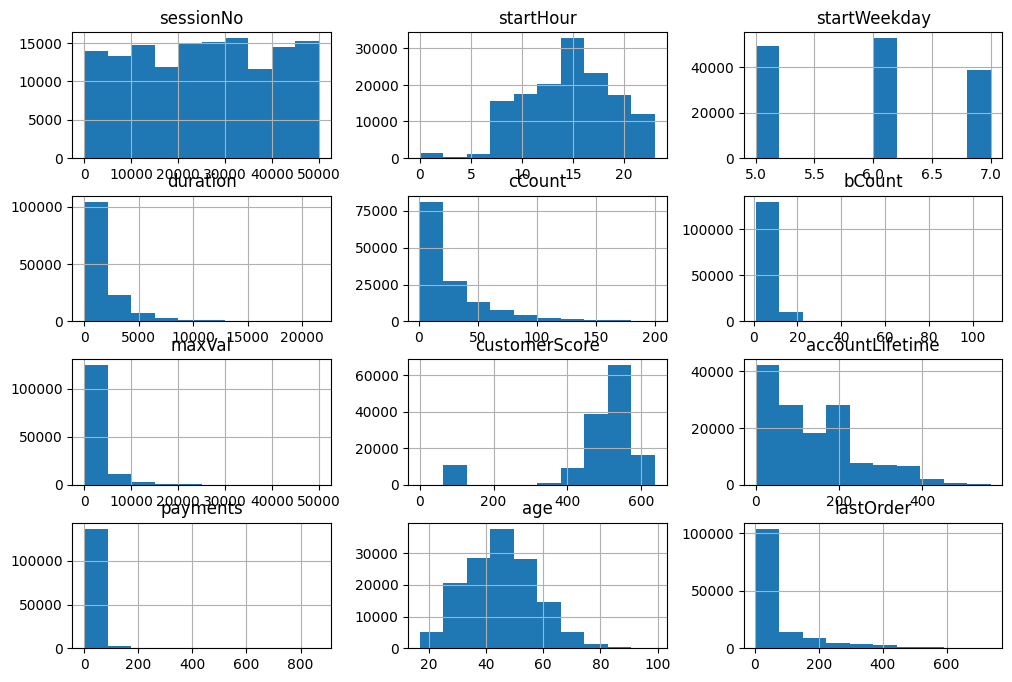

In [17]:
# Summary statistics for numeric columns
print(df[numeric_cols].describe())

# Visualize the distributions of numeric columns
import matplotlib.pyplot as plt
df[numeric_cols].hist(figsize=(12, 8))
plt.show()

In [18]:
# Explore the categorical columns
for col in categorical_cols:
    print(f"Column: {col}")

    # Check number of unique values
    unique_values = df[col].unique()
    print(f"Number of unique values: {len(unique_values)}")

    # Print the top 10 most frequent values
    value_counts = df[col].value_counts()
    print("Most frequent values:")
    print(value_counts.head(10))

    # Check for any unexpected or invalid values
    unusual_values = value_counts[value_counts < 10].index
    if len(unusual_values) > 0:
        print("Unusual/Infrequent values:")
        print(unusual_values)
    print("---")

Column: cMinPrice
Number of unique values: 498
Most frequent values:
cMinPrice
9.99     19123
3.99     15828
19.99     7420
12.99     6209
4.99      5905
14.99     5861
7.99      4730
29.99     4410
3.0       4010
6.99      3928
Name: count, dtype: int64
Unusual/Infrequent values:
Index(['1799.99', '79.0', '309.99', '4.6', '51.96', '13.95', '13.9', '149.95',
       '759.99', '36.85',
       ...
       '999.9', '180.0', '819.0', '134.99', '12.27', '489.99', '1699.99',
       '18.5', '38.64', '8.75'],
      dtype='object', name='cMinPrice', length=204)
---
Column: cMaxPrice
Number of unique values: 635
Most frequent values:
cMaxPrice
29.99    11639
19.99     9533
39.99     8769
49.99     8423
24.99     6236
59.99     6145
99.99     4514
79.99     4098
59.95     4027
34.99     3909
Name: count, dtype: int64
Unusual/Infrequent values:
Index(['949.0', '69.96', '7.5', '85.0', '3394.03', '45.9', '75.9', '100.5',
       '36.85', '1739.0',
       ...
       '82.99', '15.9', '1039.99', '1599.0',

In [19]:
# Cross-validate columns
print(df.loc[df['cCount'] > df['bCount']])

        sessionNo  startHour  startWeekday  duration  cCount cMinPrice  \
11            3.0        6.0           5.0   324.278    11.0      9.99   
20            5.0        6.0           5.0  2738.467    45.0     12.99   
21            5.0        6.0           5.0  2797.247    45.0     12.99   
27            7.0        6.0           5.0   268.713     6.0       3.0   
28            7.0        6.0           5.0   274.297     6.0       3.0   
...           ...        ...           ...       ...     ...       ...   
428953    49993.0       18.0           7.0  3866.511    69.0      9.99   
428954    49993.0       18.0           7.0  3915.585    69.0      9.99   
428955    49993.0       18.0           7.0  4094.847    69.0      9.99   
428956    49993.0       18.0           7.0  4113.213    69.0      9.99   
428972    49995.0       18.0           7.0   572.544    22.0      9.99   

       cMaxPrice cSumPrice  bCount bMinPrice  ...          availability  \
11         29.99    109.95     2.0  

In [20]:
# Identify outliers using z-score
from scipy.stats import zscore

z = np.abs(zscore(df[numeric_cols]))

# Create a boolean mask for outlier rows, considering any outlier across columns
outlier_mask = (z > 3).any(axis=1)

# Filter the DataFrame using the outlier mask
outliers = df[outlier_mask]

print(outliers)

        sessionNo  startHour  startWeekday  duration  cCount cMinPrice  \
1             1.0        6.0           5.0    11.940     1.0     59.99   
77           12.0        6.0           5.0   555.557    14.0      5.99   
78           12.0        6.0           5.0   594.719    14.0      5.99   
79           12.0        6.0           5.0   638.904    14.0      5.99   
80           12.0        6.0           5.0   735.665    14.0      5.99   
...           ...        ...           ...       ...     ...       ...   
428739    49975.0       18.0           7.0   992.672    17.0       5.0   
428740    49975.0       18.0           7.0  1054.158    17.0       5.0   
428741    49975.0       18.0           7.0  1075.531    17.0       5.0   
428742    49975.0       18.0           7.0  1127.911    17.0       5.0   
428743    49975.0       18.0           7.0  1183.038    17.0       5.0   

       cMaxPrice cSumPrice  bCount bMinPrice  ...          availability  \
1          59.99     59.99     1.0  

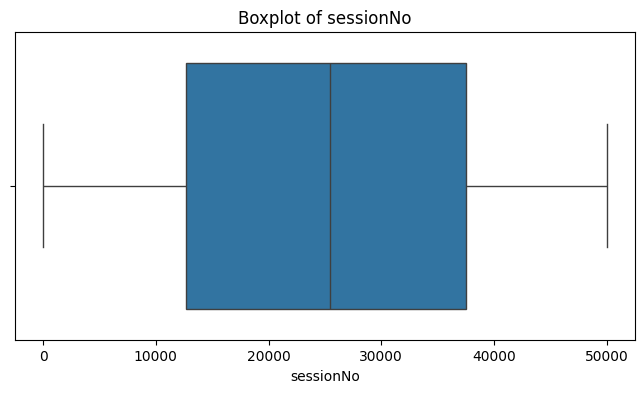

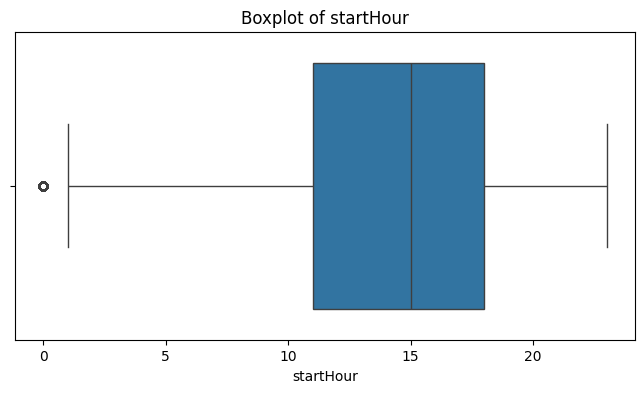

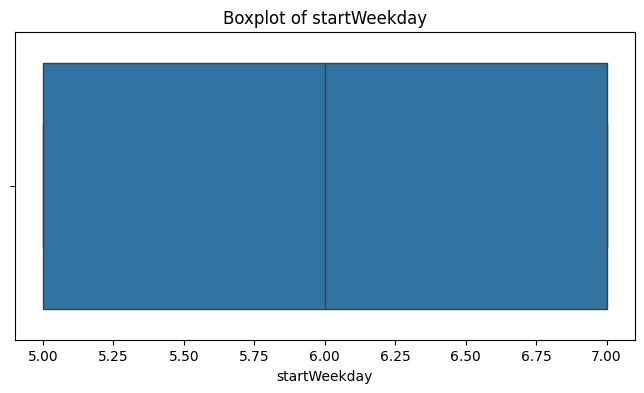

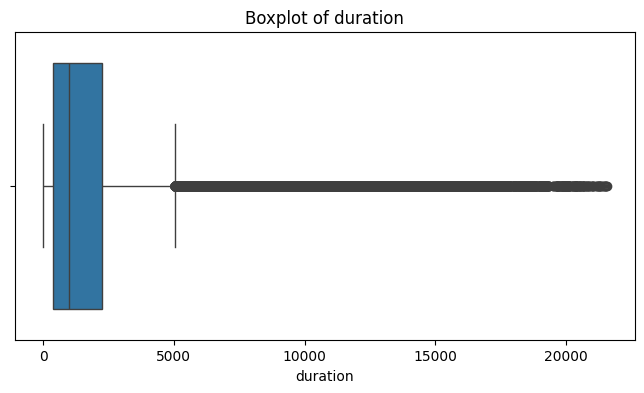

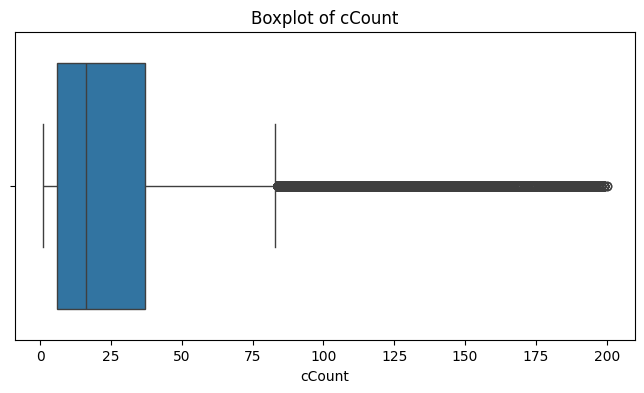

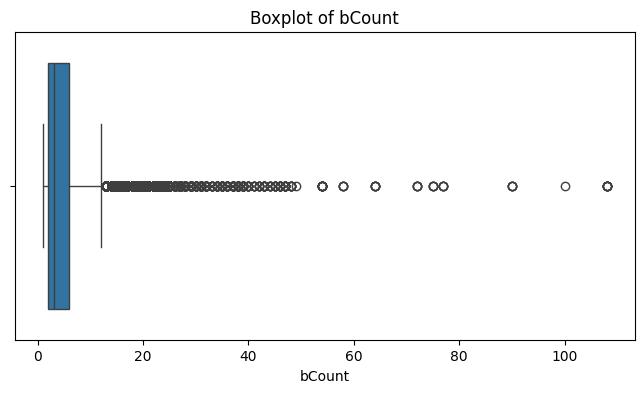

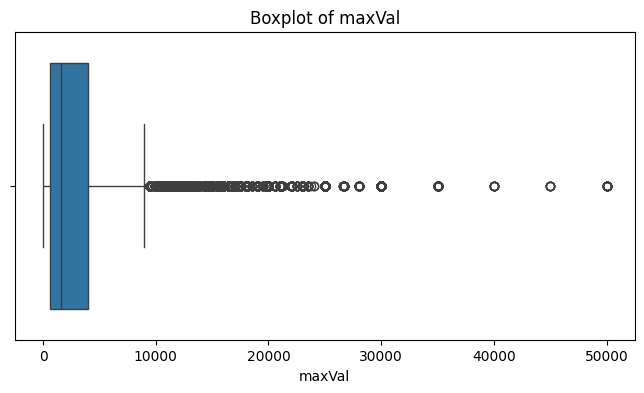

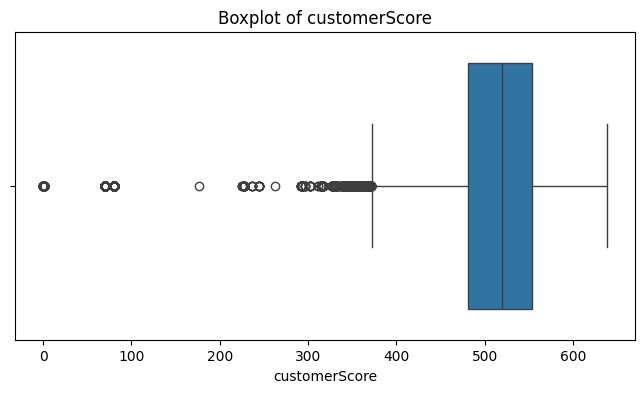

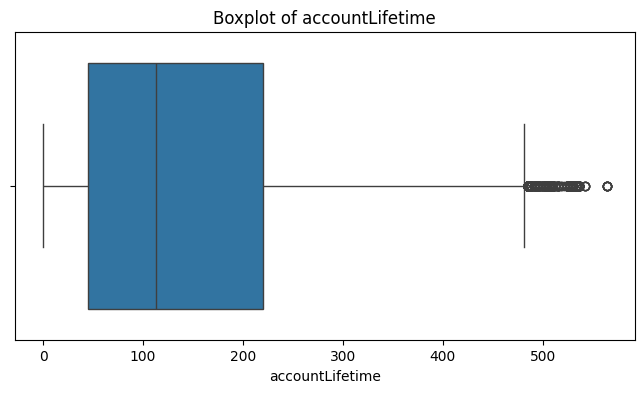

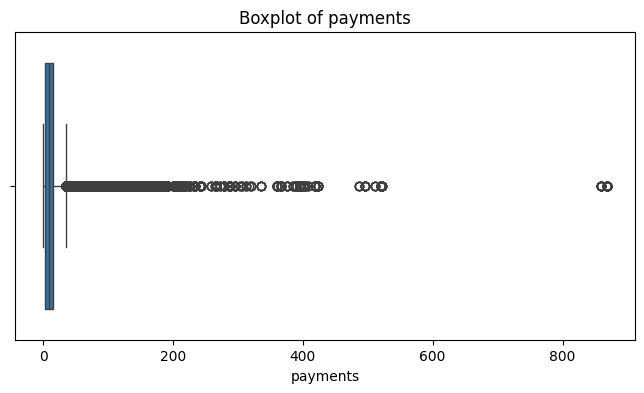

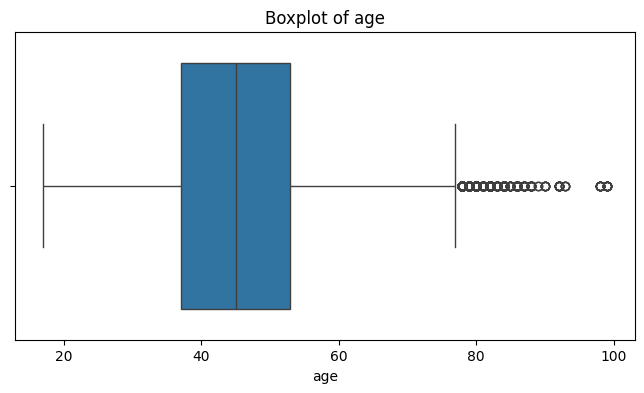

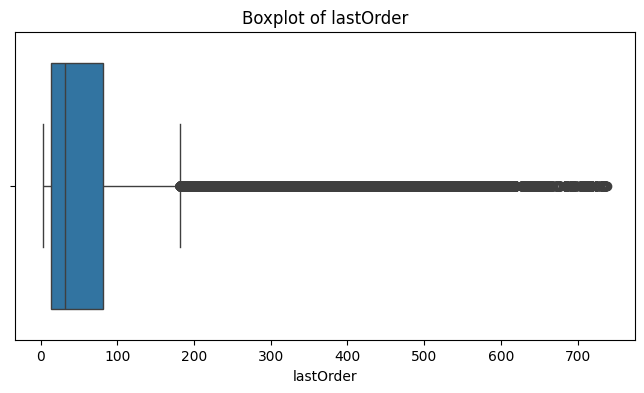

In [21]:
# Boxplots for each numeric column to spot outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [22]:
# Get unique values in categorical columns
for col in categorical_cols:
    print(f"Unique values in {col}:\n", df[col].unique())

Unique values in cMinPrice:
 ['59.99' '9.99' '12.99' '3.0' '5.99' '19.99' '0.8' '49.99' '14.99' '4.99'
 '29.99' '24.99' '139.99' '7.99' '5.0' '7.0' '3.99' '47.99' '49.95'
 '39.99' '2.99' '16.99' '44.99' '17.99' '1.5' '1.0' '54.99' '39.95' '13.9'
 '40.99' '349.99' '29.97' '23.99' '0.0' '79.82' '15.0' '599.0' '249.99'
 '4.97' '6.99' '69.99' '999.99' '159.99' '11.99' '15.99' '39.9' '6.47'
 '179.99' '12.0' '309.99' '279.99' '149.99' '11.98' '6.0' '299.99' '45.0'
 '27.99' '10.0' '469.99' '229.99' '10.99' '8.99' '18.0' '34.99' '0.19'
 '1199.0' '17.95' '79.99' '399.99' '34.95' '949.99' '169.99' '14.95'
 '14.0' '89.99' '4.0' '2.95' '16.8' '129.99' '13.99' '29.95' '379.99'
 '8.0' '129.0' '89.9' '119.95' '27.85' '99.99' '8.95' '499.99' '499.0'
 '20.0' '6.96' '22.99' '0.99' '62.99' '19.95' '189.99' '29.9' '2.75'
 '25.99' '29.0' '12.95' '449.99' '4.5' '9.0' '28.0' '8.39' '199.99'
 '56.99' '269.99' '7.95' '419.99' '8.9' '9.95' '19.0' '1.99' '119.0'
 '79.9' '15.95' '25.2' '729.99' '599.99' '24.9' '4

In [23]:
#Convert all to lowercase
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.lower())

In [24]:
# Check logical consistency between min and max price columns
inconsistent_prices = df[df['cMinPrice'] > df['cMaxPrice']]
print("Rows with inconsistent price values:\n", inconsistent_prices)

Rows with inconsistent price values:
         sessionNo  startHour  startWeekday  duration  cCount cMinPrice  \
11            3.0        6.0           5.0   324.278    11.0      9.99   
27            7.0        6.0           5.0   268.713     6.0       3.0   
28            7.0        6.0           5.0   274.297     6.0       3.0   
29            7.0        6.0           5.0   286.562     6.0       3.0   
31            7.0        6.0           5.0   304.672     6.0       3.0   
...           ...        ...           ...       ...     ...       ...   
428953    49993.0       18.0           7.0  3866.511    69.0      9.99   
428954    49993.0       18.0           7.0  3915.585    69.0      9.99   
428955    49993.0       18.0           7.0  4094.847    69.0      9.99   
428956    49993.0       18.0           7.0  4113.213    69.0      9.99   
428972    49995.0       18.0           7.0   572.544    22.0      9.99   

       cMaxPrice cSumPrice  bCount bMinPrice  ...          availability  

In [25]:
# Correct inconsistent price values
df.loc[df['cMinPrice'] > df['cMaxPrice'], ['cMinPrice', 'cMaxPrice']] = df.loc[df['cMinPrice'] > df['cMaxPrice'], ['cMaxPrice', 'cMinPrice']].values

In [26]:
print(df.describe(include='all'))


            sessionNo      startHour   startWeekday       duration  \
count   141163.000000  141163.000000  141163.000000  141163.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     25271.805494      14.662865       5.924555    1838.816338   
std      14442.609194       4.324934       0.787167    2512.450329   
min          1.000000       0.000000       5.000000       0.062000   
25%      12702.000000      11.000000       5.000000     383.329000   
50%      25482.000000      15.000000       6.000000     992.864000   
75%      37533.000000      18.000000       7.000000    2245.432500   
max      49995.000000      23.000000       7.000000   21553.323000   

               cCount cMinPrice cMaxPrice cSumPrice         bCount bMinPrice  \
count   141163.000000    141163    141163    141163  141163.000000    141163   

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate through columns of X_train and encode object (string) types
for col in X_train.select_dtypes(include=['object']).columns:
    # Fit on the combined unique values from both training and testing data
    all_values = pd.concat([X_train[col], X_test[col]]).unique()
    encoder.fit(all_values)

    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col]) # Apply the same encoding to X_test

# Create and train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data  #This line is added to get predictions from the model
y_pred_rf = rf_model.predict(X_test)

# Hitung akurasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# Tampilkan laporan klasifikasi dan matriks konfusi
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

Accuracy (Random Forest): 0.957283524994687
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.99      0.78      0.87      7884
           1       0.95      1.00      0.97     34465

    accuracy                           0.96     42349
   macro avg       0.97      0.89      0.92     42349
weighted avg       0.96      0.96      0.96     42349

Confusion Matrix (Random Forest):
 [[ 6117  1767]
 [   42 34423]]


## Analisis Model Klasifikasi

Model Random Forest menunjukkan kinerja yang sangat baik dalam memprediksi kategori "Order," dengan akurasi keseluruhan sebesar 95,7%. Untuk kategori "Order," model ini memiliki precision sebesar 95% dan recall 100%, yang berarti model sangat efektif dalam mendeteksi data yang benar-benar melakukan "Order." Di sisi lain, untuk kategori "Tidak Order," precision mencapai 99%, namun recall-nya lebih rendah, yaitu 78%. Hal ini menunjukkan bahwa beberapa data yang sebenarnya "Tidak Order" salah diprediksi sebagai "Order."

Berdasarkan confusion matrix, terdapat 6117 prediksi benar untuk "Tidak Order" dan 34423 untuk "Order." Namun, model juga menghasilkan 1767 data "Tidak Order" yang salah diklasifikasikan sebagai "Order," serta 42 data "Order" yang salah diprediksi sebagai "Tidak Order."

Dengan demikian, model ini sangat baik untuk mendeteksi kategori "Order," namun perlu sedikit perbaikan pada kategori "Tidak Order," yang bisa dilakukan dengan balancing data atau tuning parameter lebih lanjut.

## Visualisasi Confusion Matrix

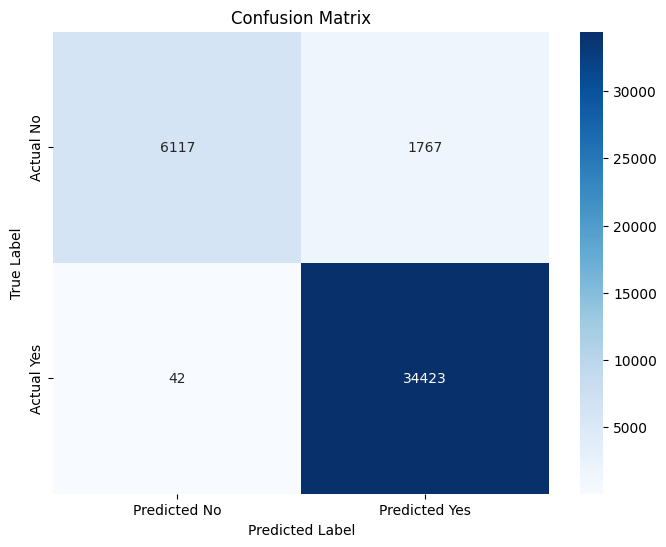

In [34]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Visualisasi ROC Curve

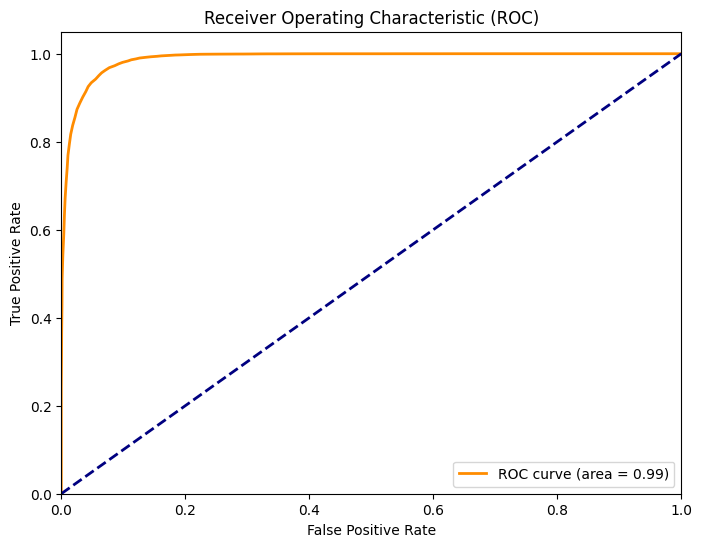

In [36]:
from sklearn.metrics import roc_curve, auc

# Assuming you have probabilities for the positive class (e.g., from predict_proba)
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Visualisasi Feature Importance

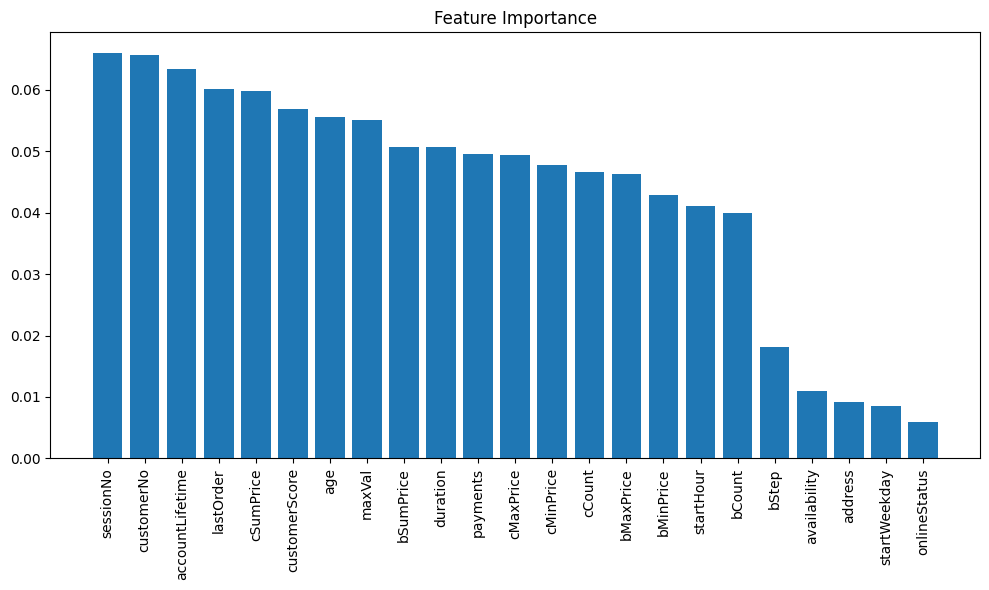

In [37]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()